In [1]:
import time
from tqdm import tqdm
import torch

# Download dataset

In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d ejlok1/cremad

 97% 439M/451M [00:02<00:00, 161MB/s]
100% 451M/451M [00:02<00:00, 210MB/s]


In [7]:
! kaggle datasets download -d cracc97/features

 90% 33.0M/36.8M [00:00<00:00, 91.1MB/s]
100% 36.8M/36.8M [00:00<00:00, 98.3MB/s]


In [8]:
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-song-audio

 94% 430M/456M [00:01<00:00, 263MB/s]
100% 456M/456M [00:02<00:00, 231MB/s]


In [9]:
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 98% 422M/429M [00:02<00:00, 203MB/s]
100% 429M/429M [00:02<00:00, 211MB/s]


In [10]:
! kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

 83% 89.0M/107M [00:00<00:00, 140MB/s]
100% 107M/107M [00:00<00:00, 168MB/s] 


In [11]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 94% 403M/428M [00:02<00:00, 215MB/s]
100% 428M/428M [00:02<00:00, 201MB/s]


In [13]:
! unzip features.zip -d features

Archive:  features.zip
  inflating: features/Female_features.csv  
  inflating: features/Male_features.csv  


In [14]:
! unzip ravdess-emotional-song-audio.zip -d ravdess-emotional-song-audio

Archive:  ravdess-emotional-song-audio.zip
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-01-02-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: ravdess-emotional-song-audio/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: ravdess-

In [15]:
! unzip ravdess-emotional-speech-audio.zip -d ravdess-emotional-speech-audio

Archive:  ravdess-emotional-speech-audio.zip
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess-emotional-speech-audio/Actor_01/03-01-02-02-02-02-01.w

In [16]:
!unzip surrey-audiovisual-expressed-emotion-savee.zip -d surrey-audiovisual-expressed-emotion-savee

Archive:  surrey-audiovisual-expressed-emotion-savee.zip
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a01.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a02.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a03.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a04.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a05.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a06.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a07.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a08.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a09.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a10.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a11.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a12.wav  
  inflating: surrey-audiovisual-expressed-emotion-savee/ALL/DC_a13.

In [17]:
!unzip toronto-emotional-speech-set-tess.zip -d toronto-emotional-speech-set-tess

Streaming output truncated to the last 5000 lines.
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: to

# Preprocessing

In [18]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import librosa 
import librosa.display

from IPython.display import Audio
plt.style.use('seaborn-white')

In [19]:
DATA_FRAMES = False
fem_path = '../content/features/Female_features.csv'
mal_path = '../content/features/Male_features.csv'

In [20]:
TESS = "../content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/" #check
RAV = "../content/ravdess-emotional-speech-audio/audio_speech_actors_01-24" #check
SAVEE = "../content/surrey-audiovisual-expressed-emotion-savee/ALL" #check

In [21]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['emotion'])
a = SAVEE_df.replace({'neutral':0, 'surprise':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6})
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df['labels'] = a

In [22]:
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['emotion'])
a = TESS_df.replace({'neutral':0, 'surprise':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6})
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df['labels'] = a

In [23]:
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
    #i = actor   
    files = os.listdir(RAV + '/' +actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['emotion', 'path']
a = RavFemales_df.replace({'neutral':0, 'surprise':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'calm':7})
RavFemales_df['labels'] = a['emotion']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['emotion', 'path']
a = RavMales_df.replace({'neutral':0, 'surprise':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'calm':7})
RavMales_df['labels'] = a['emotion']

In [25]:
labels_f = []
labels_m = []
path_f = []
path_m = []
emotion_f = []
emotion_m = []

for i in range(len(SAVEE_df)):
  path_m.append(SAVEE_df['path'][i])
  labels_m.append(SAVEE_df['labels'][i])
  emotion_m.append(SAVEE_df['emotion'][i])

for i in range(len(RavMales_df)):
  path_m.append(RavMales_df['path'][i])
  labels_m.append(RavMales_df['labels'][i])
  emotion_m.append(RavMales_df['emotion'][i])


for i in range(len(TESS_df)):
  path_f.append(TESS_df['path'][i])
  labels_f.append(TESS_df['labels'][i])
  emotion_f.append(TESS_df['emotion'][i])

for i in range(len(RavFemales_df)):
  path_f.append(RavFemales_df['path'][i])
  labels_f.append(RavFemales_df['labels'][i])
  emotion_f.append(RavFemales_df['emotion'][i])


In [26]:
d_f = {'labels': labels_f, 'path': path_f, 'emotion' : emotion_f}
Females = pd.DataFrame(data=d_f)

d_m = {'labels': labels_m, 'path': path_m,  'emotion' : emotion_m}
Males = pd.DataFrame(data=d_m)

In [27]:
Nogender = pd.concat([Females, Males], ignore_index=True, sort=False)

In [28]:
Nogender = Nogender.sample(frac=1)

In [29]:
Nogender = Nogender.reset_index(drop=True)

In [30]:
Nogender = Nogender[(Nogender["emotion"]=="neutral") | (Nogender["emotion"]=="happy") | (Nogender["emotion"]=="sad") | (Nogender["emotion"]=="angry")]

In [31]:
Nogender

,labels,path,emotion
0,2,../content/toronto-emotional-speech-set-tess/t...,happy
1,0,../content/ravdess-emotional-speech-audio/audi...,neutral
3,3,../content/ravdess-emotional-speech-audio/audi...,sad
5,2,../content/ravdess-emotional-speech-audio/audi...,happy
6,3,../content/ravdess-emotional-speech-audio/audi...,sad
...,...,...,...
4712,3,../content/ravdess-emotional-speech-audio/audi...,sad
4713,3,../content/toronto-emotional-speech-set-tess/t...,sad
4715,2,../content/toronto-emotional-speech-set-tess/t...,happy
4716,0,../content/surrey-audiovisual-expressed-emotio...,neutral


In [32]:
train_df = Nogender.sample(frac=0.8)
test_df = Nogender.drop(train_df.index)

In [33]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [34]:
train_df["emotion"].value_counts()

happy      526
angry      519
sad        516
neutral    497
Name: emotion, dtype: int64

# Tokenization

In [35]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
     |████████████████████████████████| 120 kB 80.9 MB/s 
     |████████████████████████████████| 6.6 MB 43.1 MB/s 


In [36]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 4.0 MB/s 
     |████████████████████████████████| 115 kB 75.9 MB/s 
     |████████████████████████████████| 212 kB 83.4 MB/s 
     |████████████████████████████████| 127 kB 84.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [37]:
train_df

,labels,path,emotion
0,4,../content/toronto-emotional-speech-set-tess/t...,angry
1,4,../content/toronto-emotional-speech-set-tess/t...,angry
2,2,../content/ravdess-emotional-speech-audio/audi...,happy
3,4,../content/toronto-emotional-speech-set-tess/t...,angry
4,2,../content/toronto-emotional-speech-set-tess/t...,happy
...,...,...,...
2053,0,../content/toronto-emotional-speech-set-tess/t...,neutral
2054,3,../content/toronto-emotional-speech-set-tess/t...,sad
2055,2,../content/toronto-emotional-speech-set-tess/t...,happy
2056,3,../content/ravdess-emotional-speech-audio/audi...,sad


In [38]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

train_speech = []
index_list = []
for i in range(len(train_df["path"])):
  try:
    speech, _ = librosa.load(train_df["path"][i], sr=16000, mono=True)
    train_speech.append(speech)
  except:
    train_speech.append([])
    index_list.append(i)
train_df["speech"] = train_speech
train_df.drop(train_df.index[index_list],inplace=True)

test_speech = []
index_list = []
for i in range(len(test_df["path"])):
  try:
    speech, _ = librosa.load(test_df["path"][i], sr=16000, mono=True)
    test_speech.append(speech)
  except:
    test_speech.append([])
    index_list.append(i)
test_df["speech"] = test_speech
test_df.drop(test_df.index[index_list],inplace=True)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [39]:
train_data = Dataset.from_pandas(train_df)
test_data = Dataset.from_pandas(test_df)

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")

train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

# Turn data into a Dataset object

In [40]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        pattern = {0:0, 2:1, 3:3, 4:2}
        self.labels = [pattern[x] for x in labels]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
    

train_dataset = EmotionDataset(train_encodings, list(train_data["labels"]))
test_dataset = EmotionDataset(test_encodings, list(test_data["labels"]))

# Loading the Model and Optimizer

In [41]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

# Loading the model
model = HubertForSequenceClassification.from_pretrained("superb/hubert-large-superb-er")

# Loading the optimizer
optim = AdamW(model.parameters(), lr=1e-5)

# Training

In [42]:
# Prediction function
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [43]:
# Training

from torch.utils.data import DataLoader

# Set the number of epoch
epoch = 3

# Start training
model.train()

train_loss = list()
train_accuracies = list()
for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))
    time.sleep(0.3)

    # Get training data by DataLoader
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
    
    correct = 0
    count = 0
    epoch_loss = list()
    
    pbar = tqdm(train_loader)
    for batch in pbar:
        #print(batch)
        optim.zero_grad()
        input_ids = batch['input_values']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()
        
        # make predictions
        predictions = predict(outputs)

        # count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # show progress along with metrics
        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })
        
        # record the loss for each batch
        epoch_loss.append(loss.item())
        
    pbar.close()
    
    # record the loss and accuracy for each epoch
    train_loss += epoch_loss
    train_accuracies.append(accuracy)

Epoch 1/3


100%|██████████| 636/636 [1:16:58<00:00,  7.26s/it, Loss=0.005, Accuracy=0.884]


Epoch 2/3


100%|██████████| 636/636 [1:13:39<00:00,  6.95s/it, Loss=0.000, Accuracy=0.982]


Epoch 3/3


100%|██████████| 636/636 [1:13:30<00:00,  6.93s/it, Loss=0.003, Accuracy=0.995]


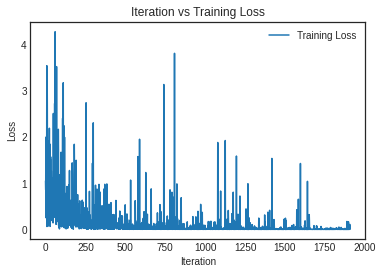

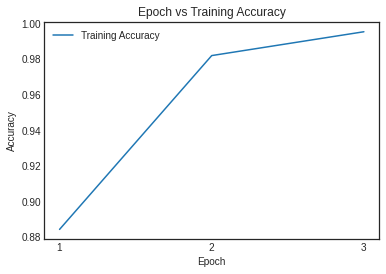

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Iteration vs Training Loss
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")  
plt.legend()
plt.show()

# Plot Epoch vs Training Accuracy
acc_X = np.arange(len(train_accuracies))+1                          
plt.plot(acc_X, train_accuracies,"-", label="Training Accuracy")
plt.xticks(acc_X)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")  
plt.legend()
plt.show()

# Testing

In [45]:
# Testing
from torch.utils.data import DataLoader

# Get test data by DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Start testing
model.eval()

with torch.no_grad():
    
    correct = 0
    count = 0
    record = {"labels":list(), "predictions":list()}
    
    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        
        # make predictions
        predictions = predict(outputs)

        # count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # show progress along with metrics
        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })
    
        # record the results
        record["labels"] += labels.cpu().numpy().tolist()
        record["predictions"] += predictions.cpu().numpy().tolist()
        
    pbar.close()
    
time.sleep(0.3)
print("The final accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 329/329 [05:13<00:00,  1.05it/s, loss=0.000, accuracy=0.997]


The final accuracy on the test dataset: 99.696%
